## 1. Clipped dataset test

### Linear regression

In [1]:
results = []

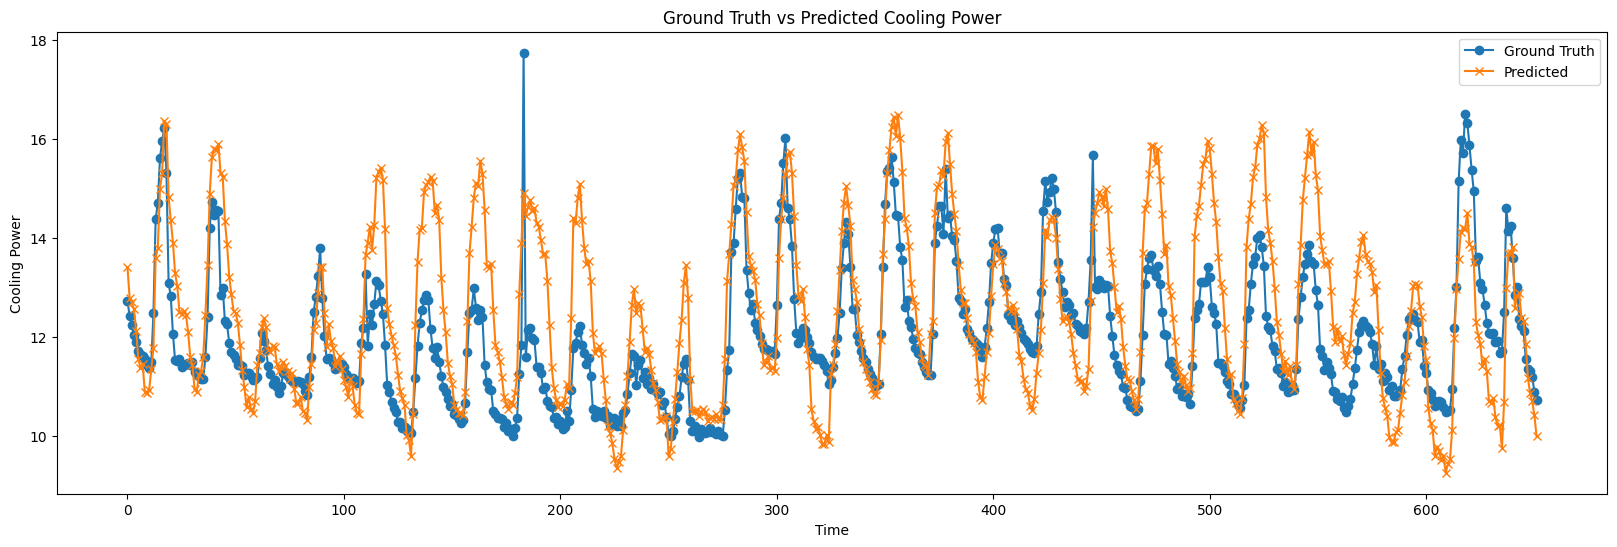

Test MAE: 0.97
Test MAPE: 8.02%
Test RMSE: 1.23


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('./clipped_dataset/Clipped_all_features.csv')
data['timestamp'] = pd.to_datetime(data['timestamp'])  # Ensure timestamp is datetime

# Set timestamp as index (optional for time-series)
data.set_index('timestamp', inplace=True)

# Define features and target
features = data.drop(columns=['cooling_power'])
target = data['cooling_power']

# Split the dataset into train, validation, and test sets
train_size = 0.7
val_size = 0.15

X_train, X_temp, y_train, y_temp = train_test_split(features, target, test_size=(1 - train_size), shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=(val_size / (1 - train_size)), shuffle=False)

# Apply Min-Max Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

def evaluate_model(model, X, y):
    predictions = model.predict(X)
    mae = mean_absolute_error(y, predictions)
    mape = np.mean(np.abs((y - predictions) / y)) * 100
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return mae, mape, rmse

# Hyperparameter tuning with Ridge and Lasso regression
best_model = None
best_score = float('inf')

for alpha in [0.01, 0.1, 1, 10, 100]:
    for model_type in [Ridge, Lasso]:
        model = model_type(alpha=alpha)
        model.fit(X_train_scaled, y_train)
        val_mae, val_mape, val_rmse = evaluate_model(model, X_val_scaled, y_val)
        if val_rmse < best_score:
            best_score = val_rmse
            best_model = model

# Final evaluation on test set with the best model
test_mae, test_mape, test_rmse = evaluate_model(best_model, X_test_scaled, y_test)

# Predict test data
predictions_test = best_model.predict(X_test_scaled)

# Plot results
plt.figure(figsize=(20, 6))
plt.plot(y_test.values, label='Ground Truth', marker='o')
plt.plot(predictions_test, label='Predicted', marker='x')
plt.title('Ground Truth vs Predicted Cooling Power')
plt.xlabel('Time')
plt.ylabel('Cooling Power')
plt.legend()
plt.show()

# Evaluation metrics
print(f"Test MAE: {test_mae:.2f}")
print(f"Test MAPE: {test_mape:.2f}%")
print(f"Test RMSE: {test_rmse:.2f}")
results.append(['LR_All',test_mae, test_mape, test_rmse])


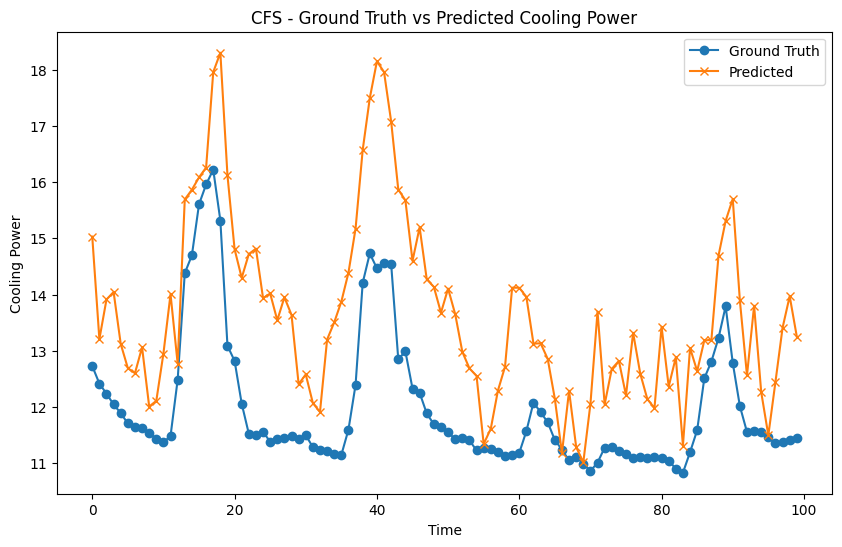

Test MAE: 1.89
Test MAPE: 15.93%
Test RMSE: 2.24


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('./clipped_dataset/Clipped_CFS.csv')
data['timestamp'] = pd.to_datetime(data['timestamp'])  # Ensure timestamp is datetime

# Set timestamp as index (optional for time-series)
data.set_index('timestamp', inplace=True)

# Define features and target
features = data.drop(columns=['cooling_power'])
target = data['cooling_power']

# Split the dataset into train, validation, and test sets
train_size = 0.7
val_size = 0.15

X_train, X_temp, y_train, y_temp = train_test_split(features, target, test_size=(1 - train_size), shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=(val_size / (1 - train_size)), shuffle=False)

# Apply Min-Max Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

def evaluate_model(model, X, y):
    predictions = model.predict(X)
    mae = mean_absolute_error(y, predictions)
    mape = np.mean(np.abs((y - predictions) / y)) * 100
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return mae, mape, rmse

# Hyperparameter tuning with Ridge and Lasso regression
best_model = None
best_score = float('inf')

for alpha in [0.01, 0.1, 1, 10, 100]:
    for model_type in [Ridge, Lasso]:
        model = model_type(alpha=alpha)
        model.fit(X_train_scaled, y_train)
        val_mae, val_mape, val_rmse = evaluate_model(model, X_val_scaled, y_val)
        if val_rmse < best_score:
            best_score = val_rmse
            best_model = model

# Final evaluation on test set with the best model
test_mae, test_mape, test_rmse = evaluate_model(best_model, X_test_scaled, y_test)

# Predict test data
predictions_test = best_model.predict(X_test_scaled)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:100], label='Ground Truth', marker='o')
plt.plot(predictions_test[:100], label='Predicted', marker='x')
plt.title('CFS - Ground Truth vs Predicted Cooling Power')
plt.xlabel('Time')
plt.ylabel('Cooling Power')
plt.legend()
plt.show()

# Evaluation metrics
print(f"Test MAE: {test_mae:.2f}")
print(f"Test MAPE: {test_mape:.2f}%")
print(f"Test RMSE: {test_rmse:.2f}")

results.append(['LR_CFS',test_mae, test_mape, test_rmse])

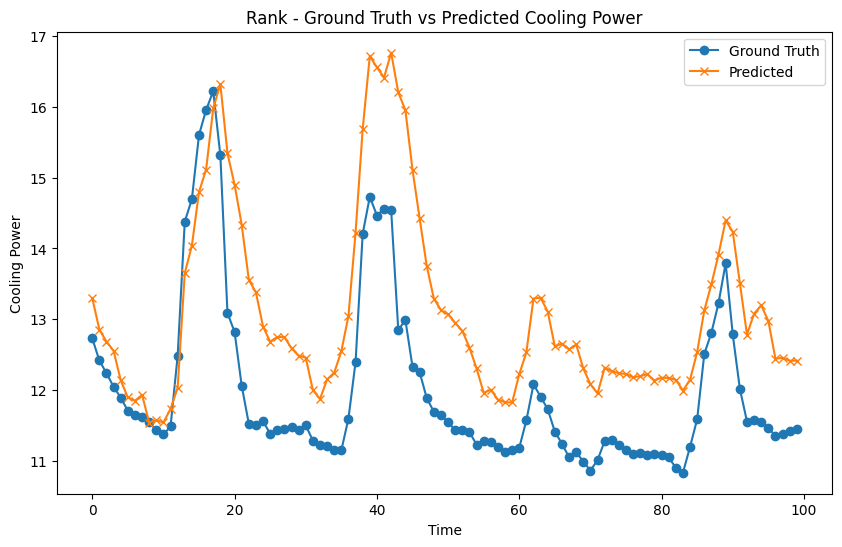

Test MAE: 1.69
Test MAPE: 14.23%
Test RMSE: 1.99


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('./clipped_dataset/Clipped_Rank.csv')
data['timestamp'] = pd.to_datetime(data['timestamp'])  # Ensure timestamp is datetime

# Set timestamp as index (optional for time-series)
data.set_index('timestamp', inplace=True)

# Define features and target
features = data.drop(columns=['cooling_power'])
target = data['cooling_power']

# Split the dataset into train, validation, and test sets
train_size = 0.7
val_size = 0.15

X_train, X_temp, y_train, y_temp = train_test_split(features, target, test_size=(1 - train_size), shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=(val_size / (1 - train_size)), shuffle=False)

# Apply Min-Max Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

def evaluate_model(model, X, y):
    predictions = model.predict(X)
    mae = mean_absolute_error(y, predictions)
    mape = np.mean(np.abs((y - predictions) / y)) * 100
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return mae, mape, rmse

# Hyperparameter tuning with Ridge and Lasso regression
best_model = None
best_score = float('inf')

for alpha in [0.01, 0.1, 1, 10, 100]:
    for model_type in [Ridge, Lasso]:
        model = model_type(alpha=alpha)
        model.fit(X_train_scaled, y_train)
        val_mae, val_mape, val_rmse = evaluate_model(model, X_val_scaled, y_val)
        if val_rmse < best_score:
            best_score = val_rmse
            best_model = model

# Final evaluation on test set with the best model
test_mae, test_mape, test_rmse = evaluate_model(best_model, X_test_scaled, y_test)

# Predict test data
predictions_test = best_model.predict(X_test_scaled)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:100], label='Ground Truth', marker='o')
plt.plot(predictions_test[:100], label='Predicted', marker='x')
plt.title('Rank - Ground Truth vs Predicted Cooling Power')
plt.xlabel('Time')
plt.ylabel('Cooling Power')
plt.legend()
plt.show()

# Evaluation metrics
print(f"Test MAE: {test_mae:.2f}")
print(f"Test MAPE: {test_mape:.2f}%")
print(f"Test RMSE: {test_rmse:.2f}")

results.append(['LR_Rank',test_mae, test_mape, test_rmse])

### ARIMAX, SARIMAX

In [6]:
results=[]

c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


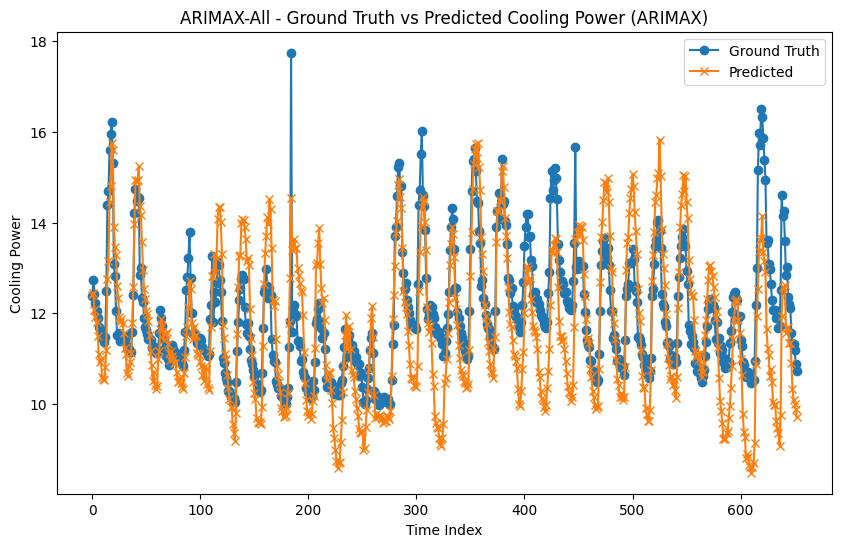

Test MAE: 0.86
Test RMSE: 1.05
Test MAPE: 7.09%


c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\johnl\anaconda3\envs

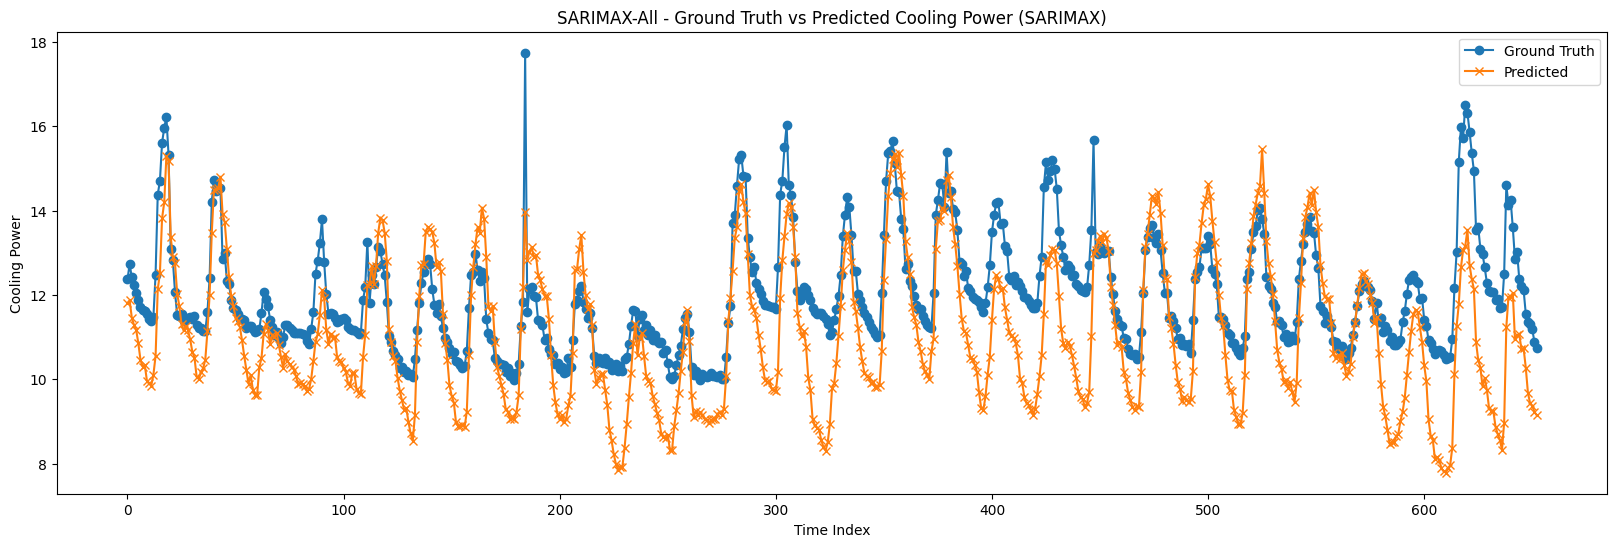

Test MAE: 1.15
Test RMSE: 1.39
Test MAPE: 26.77%


c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


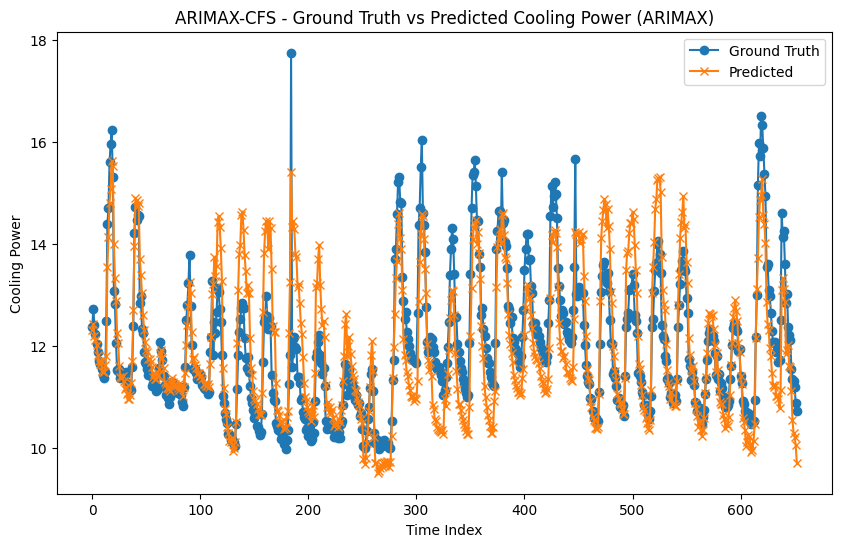

Test MAE: 0.60
Test RMSE: 0.77
Test MAPE: 4.90%


c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\johnl\anaconda3\envs

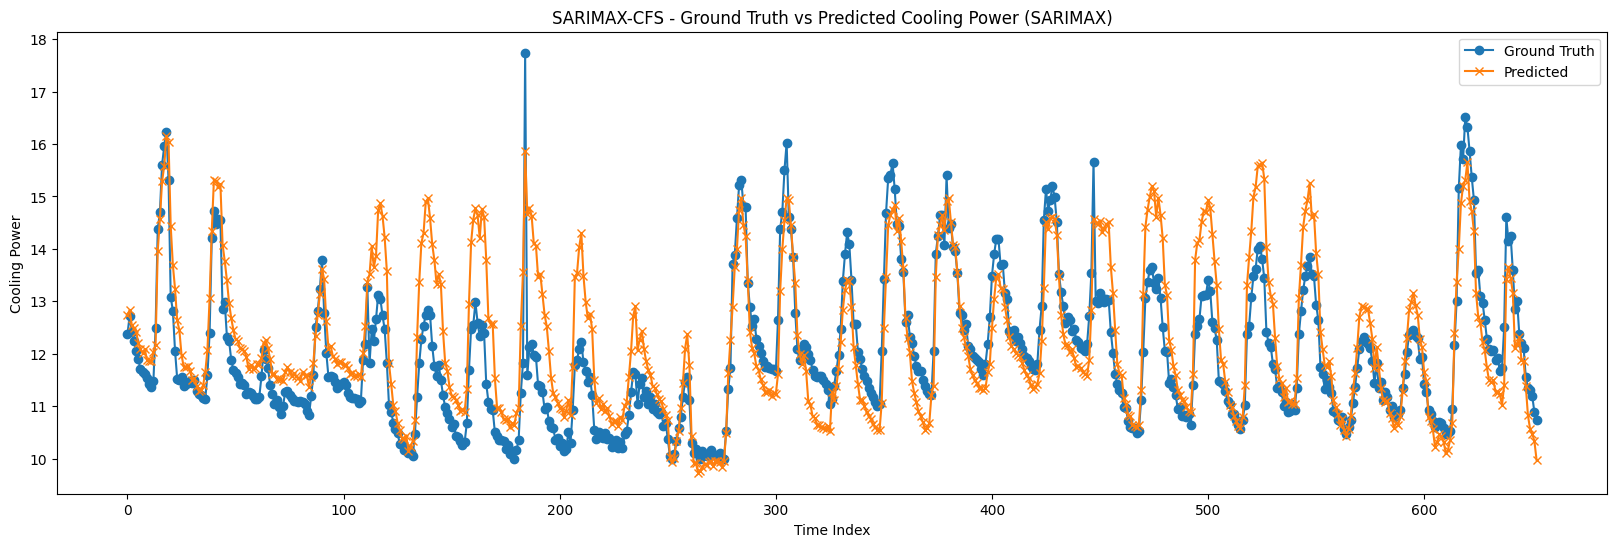

Test MAE: 0.65
Test RMSE: 0.83
Test MAPE: 19.08%


c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


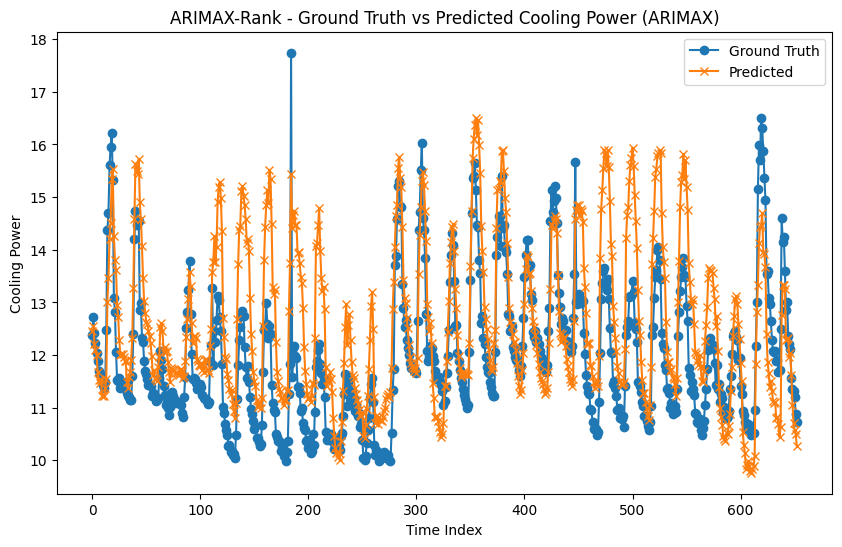

Test MAE: 0.95
Test RMSE: 1.16
Test MAPE: 7.91%


c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


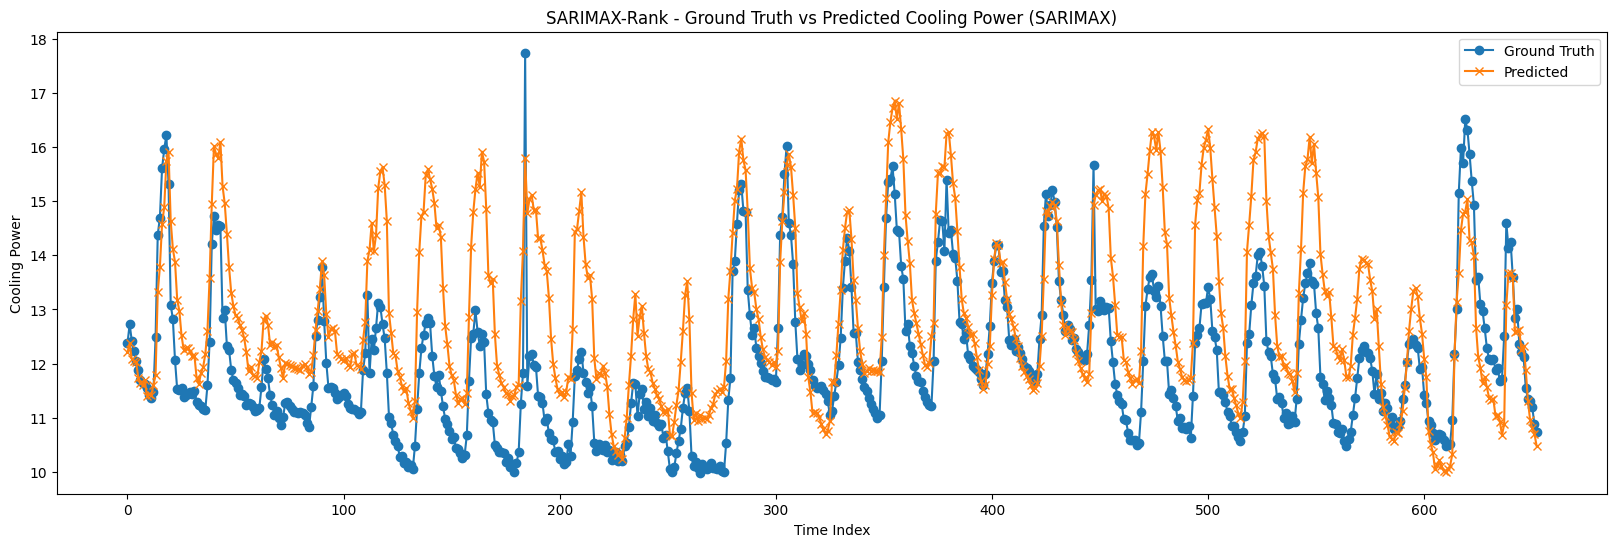

Test MAE: 1.12
Test RMSE: 1.36
Test MAPE: 15.55%


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from itertools import product

i=0
index=['ARIMAX-All','SARIMAX-All','ARIMAX-CFS','SARIMAX-CFS','ARIMAX-Rank','SARIMAX-Rank']
for path in ['./clipped_dataset/Clipped_all_features.csv','./clipped_dataset/Clipped_CFS.csv','./clipped_dataset/Clipped_Rank.csv']:
    data = pd.read_csv(path)
    data['timestamp'] = pd.to_datetime(data['timestamp'])  # Ensure timestamp is datetime

    # Set timestamp as index
    data.set_index('timestamp', inplace=True)

    # Define target and exogenous features
    target = data['cooling_power']
    exog = data.drop(columns=['cooling_power'])

    # Split the dataset into train, validation, and test sets
    train_size = 0.7
    val_size = 0.15

    train_end = int(len(data) * train_size)
    val_end = train_end + int(len(data) * val_size)

    y_train, y_val, y_test = target[:train_end], target[train_end:val_end], target[val_end:]
    exog_train, exog_val, exog_test = exog[:train_end], exog[train_end:val_end], exog[val_end:]

    # Hyperparameter tuning for ARIMAX using AIC
    best_arimax_order = (1,1,1)
    best_arimax_aic = float('inf')

    p_values = range(1, 2)
    d_values = range(1, 2)
    q_values = range(1, 2)

    # for order in product(p_values, d_values, q_values):
    #     try:
    #         model = ARIMA(endog=y_train, exog=exog_train, order=order)
    #         model_fit = model.fit()
    #         if model_fit.aic < best_arimax_aic:
    #             best_arimax_aic = model_fit.aic
    #             best_arimax_order = order
    #     except Exception as e:
    #         continue

    # Hyperparameter tuning for SARIMAX using AIC
    best_sarimax_order = (2,1,1)
    best_sarimax_seasonal_order = (0,0,1,24)
    best_sarimax_aic = float('inf')

    seasonal_p_values = range(0, 2)
    seasonal_d_values = range(0, 1)
    seasonal_q_values = range(0, 2)
    seasonal_m = [24]

    # for order in product(p_values, d_values, q_values):
    #     for seasonal_order in product(seasonal_p_values, seasonal_d_values, seasonal_q_values, seasonal_m):
    #         try:
    #             model = SARIMAX(endog=y_train, exog=exog_train, order=order, seasonal_order=seasonal_order)
    #             model_fit = model.fit(disp=False)
    #             if model_fit.aic < best_sarimax_aic:
    #                 best_sarimax_aic = model_fit.aic
    #                 best_sarimax_order = order
    #                 best_sarimax_seasonal_order = seasonal_order
    #         except Exception as e:
    #             continue


    #print(best_arimax_order,best_sarimax_order,best_sarimax_seasonal_order)
    ariam_true=0
    if ariam_true==0:
        final_model = ARIMA(endog=pd.concat([y_train,y_val],axis=0), exog=pd.concat([exog_train,exog_val],axis=0), order=best_arimax_order)
        model_type = 'ARIMAX'
    else:
        final_model = SARIMAX(endog=y_train, exog=exog_train, order=best_sarimax_order, seasonal_order=best_sarimax_seasonal_order)
        model_type = 'SARIMAX'

    final_model_fit = final_model.fit()
    #print(exog_test.shape, )
    predictions_test = final_model_fit.forecast(steps=len(y_test), exog=exog_test)
    # exog_test_aligned = exog_test.loc[y_test.index]
    # predictions_test = final_model_fit.predict(
    #     start=y_test.index[0],  # Start from the first timestamp in test data
    #     end=y_test.index[-1],   # End at the last timestamp in test data
    #     exog=exog_test_aligned
    # )
    #print(predictions_test)
    predictions_test_1=predictions_test.reset_index(drop=True)
    #print(y_test)
    y_test_1=y_test.reset_index(drop=True)
    plt.figure(figsize=(10, 6))
    plt.plot(y_test_1[:].values, marker='o', label='Ground Truth')
    plt.plot(predictions_test_1[:], marker='x', label='Predicted')
    plt.title(f'{index[i]} - Ground Truth vs Predicted Cooling Power ({model_type})')
    plt.xlabel('Time Index')
    plt.ylabel('Cooling Power')
    plt.legend()
    plt.show()

    # Evaluate final model on test set
    test_mae = mean_absolute_error(y_test, predictions_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, predictions_test))
    test_mape = np.mean(np.abs((y_test - predictions_test) / y_test)) * 100

    print(f"Test MAE: {test_mae:.2f}")
    print(f"Test RMSE: {test_rmse:.2f}")
    print(f"Test MAPE: {test_mape:.2f}%")
    results.append([index[i],test_mae, test_mape, test_rmse])
    i+=1
    ariam_true=1
    if ariam_true==0:
        final_model = ARIMA(endog=pd.concat([y_train,y_val],axis=0), exog=pd.concat([exog_train,exog_val],axis=0), order=best_arimax_order)
        model_type = 'ARIMAX'
    else:
        final_model = SARIMAX(endog=y_train, exog=exog_train, order=best_sarimax_order, seasonal_order=best_sarimax_seasonal_order)
        model_type = 'SARIMAX'

    final_model_fit = final_model.fit()
    #print(exog_test.shape, )
    predictions_test = final_model_fit.forecast(steps=len(y_test), exog=exog_test)
    # exog_test_aligned = exog_test.loc[y_test.index]
    # predictions_test = final_model_fit.predict(
    #     start=y_test.index[0],  # Start from the first timestamp in test data
    #     end=y_test.index[-1],   # End at the last timestamp in test data
    #     exog=exog_test_aligned
    # )
    #print(predictions_test)
    predictions_test_1=predictions_test.reset_index(drop=True)
    #print(y_test)
    y_test_1=y_test.reset_index(drop=True)
    plt.figure(figsize=(20, 6))
    plt.plot(y_test_1[:].values, marker='o', label='Ground Truth')
    plt.plot(predictions_test_1[:], marker='x', label='Predicted')
    plt.title(f'{index[i]} - Ground Truth vs Predicted Cooling Power ({model_type})')
    plt.xlabel('Time Index')
    plt.ylabel('Cooling Power')
    plt.legend()
    plt.show()

    # Evaluate final model on test set
    test_mae = mean_absolute_error(y_test, predictions_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, predictions_test))
    test_mape = np.mean(np.abs((y_test - predictions_test) / y_test)) * 100

    print(f"Test MAE: {test_mae:.2f}")
    print(f"Test RMSE: {test_rmse:.2f}")
    print(f"Test MAPE: {test_mape:.2f}%")

    results.append([index[i],test_mae, test_mape, test_rmse])
    i+=1

c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


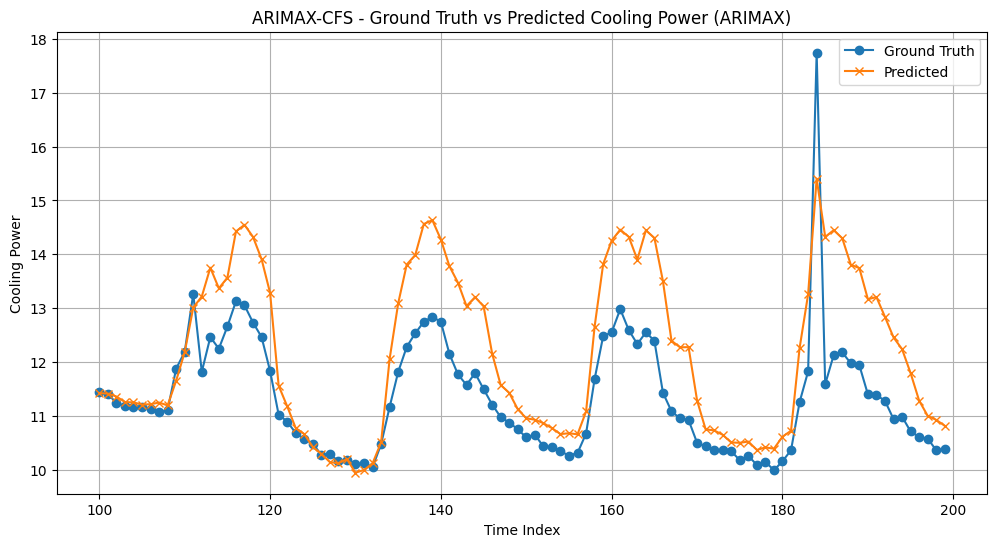

Test MAE: 0.60
Test RMSE: 0.77
Test MAPE: 4.90%


NameError: name 'results' is not defined

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from itertools import product

i=0
index=['ARIMAX-CFS','SARIMAX-CFS']
for path in ['./clipped_dataset/Clipped_CFS.csv']:
    data = pd.read_csv(path)
    data['timestamp'] = pd.to_datetime(data['timestamp'])  # Ensure timestamp is datetime

    # Set timestamp as index
    data.set_index('timestamp', inplace=True)

    # Define target and exogenous features
    target = data['cooling_power']
    exog = data.drop(columns=['cooling_power'])

    # Split the dataset into train, validation, and test sets
    train_size = 0.7
    val_size = 0.15

    train_end = int(len(data) * train_size)
    val_end = train_end + int(len(data) * val_size)

    y_train, y_val, y_test = target[:train_end], target[train_end:val_end], target[val_end:]
    exog_train, exog_val, exog_test = exog[:train_end], exog[train_end:val_end], exog[val_end:]

    # Hyperparameter tuning for ARIMAX using AIC
    best_arimax_order = (1,1,1)
    best_arimax_aic = float('inf')

    p_values = range(1, 2)
    d_values = range(1, 2)
    q_values = range(1, 2)

    # for order in product(p_values, d_values, q_values):
    #     try:
    #         model = ARIMA(endog=y_train, exog=exog_train, order=order)
    #         model_fit = model.fit()
    #         if model_fit.aic < best_arimax_aic:
    #             best_arimax_aic = model_fit.aic
    #             best_arimax_order = order
    #     except Exception as e:
    #         continue

    # Hyperparameter tuning for SARIMAX using AIC
    best_sarimax_order = (2,1,1)
    best_sarimax_seasonal_order = (0,0,1,24)
    best_sarimax_aic = float('inf')

    seasonal_p_values = range(0, 2)
    seasonal_d_values = range(0, 1)
    seasonal_q_values = range(0, 2)
    seasonal_m = [24]

    # for order in product(p_values, d_values, q_values):
    #     for seasonal_order in product(seasonal_p_values, seasonal_d_values, seasonal_q_values, seasonal_m):
    #         try:
    #             model = SARIMAX(endog=y_train, exog=exog_train, order=order, seasonal_order=seasonal_order)
    #             model_fit = model.fit(disp=False)
    #             if model_fit.aic < best_sarimax_aic:
    #                 best_sarimax_aic = model_fit.aic
    #                 best_sarimax_order = order
    #                 best_sarimax_seasonal_order = seasonal_order
    #         except Exception as e:
    #             continue


    #print(best_arimax_order,best_sarimax_order,best_sarimax_seasonal_order)
    ariam_true=0
    if ariam_true==0:
        final_model = ARIMA(endog=pd.concat([y_train,y_val],axis=0), exog=pd.concat([exog_train,exog_val],axis=0), order=best_arimax_order)
        model_type = 'ARIMAX'
    else:
        final_model = SARIMAX(endog=y_train, exog=exog_train, order=best_sarimax_order, seasonal_order=best_sarimax_seasonal_order)
        model_type = 'SARIMAX'

    final_model_fit = final_model.fit()
    #print(exog_test.shape, )
    predictions_test = final_model_fit.forecast(steps=len(y_test), exog=exog_test)
    # exog_test_aligned = exog_test.loc[y_test.index]
    # predictions_test = final_model_fit.predict(
    #     start=y_test.index[0],  # Start from the first timestamp in test data
    #     end=y_test.index[-1],   # End at the last timestamp in test data
    #     exog=exog_test_aligned
    # )
    #print(predictions_test)
    predictions_test_1=predictions_test.reset_index(drop=True)
    #print(y_test)
    y_test_1=y_test.reset_index(drop=True)
    plt.figure(figsize=(12, 6))
    plt.plot(y_test_1[100:200], marker='o', label='Ground Truth')
    plt.plot(predictions_test_1[100:200], marker='x', label='Predicted')
    plt.title(f'{index[i]} - Ground Truth vs Predicted Cooling Power ({model_type})')
    plt.xlabel('Time Index')
    plt.ylabel('Cooling Power')
    plt.legend()
    plt.grid()
    plt.show()

    # Evaluate final model on test set
    test_mae = mean_absolute_error(y_test, predictions_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, predictions_test))
    test_mape = np.mean(np.abs((y_test - predictions_test) / y_test)) * 100
    
    print(f"Test MAE: {test_mae:.2f}")
    print(f"Test RMSE: {test_rmse:.2f}")
    print(f"Test MAPE: {test_mape:.2f}%")
    results.append([index[i],test_mae, test_mape, test_rmse])
    i+=1
    # ariam_true=1
    # if ariam_true==0:
    #     final_model = ARIMA(endog=pd.concat([y_train,y_val],axis=0), exog=pd.concat([exog_train,exog_val],axis=0), order=best_arimax_order)
    #     model_type = 'ARIMAX'
    # else:
    #     final_model = SARIMAX(endog=y_train, exog=exog_train, order=best_sarimax_order, seasonal_order=best_sarimax_seasonal_order)
    #     model_type = 'SARIMAX'

    # final_model_fit = final_model.fit()
    # #print(exog_test.shape, )
    # predictions_test = final_model_fit.forecast(steps=len(y_test), exog=exog_test)
    # # exog_test_aligned = exog_test.loc[y_test.index]
    # # predictions_test = final_model_fit.predict(
    # #     start=y_test.index[0],  # Start from the first timestamp in test data
    # #     end=y_test.index[-1],   # End at the last timestamp in test data
    # #     exog=exog_test_aligned
    # # )
    # #print(predictions_test)
    # predictions_test_1=predictions_test.reset_index(drop=True)
    # #print(y_test)
    # y_test_1=y_test.reset_index(drop=True)
    # plt.figure(figsize=(20, 6))
    # plt.plot(y_test_1[:].values, marker='o', label='Ground Truth')
    # plt.plot(predictions_test_1[:], marker='x', label='Predicted')
    # plt.title(f'{index[i]} - Ground Truth vs Predicted Cooling Power ({model_type})')
    # plt.xlabel('Time Index')
    # plt.ylabel('Cooling Power')
    # plt.legend()
    # plt.show()

    # # Evaluate final model on test set
    # test_mae = mean_absolute_error(y_test, predictions_test)
    # test_rmse = np.sqrt(mean_squared_error(y_test, predictions_test))
    # test_mape = np.mean(np.abs((y_test - predictions_test) / y_test)) * 100

    # print(f"Test MAE: {test_mae:.2f}")
    # print(f"Test RMSE: {test_rmse:.2f}")
    # print(f"Test MAPE: {test_mape:.2f}%")

    # results.append([index[i],test_mae, test_mape, test_rmse])
    # i+=1

In [21]:
df=pd.DataFrame([y_test,predictions_test])
#df.columns=['y_pred']
#df.to_csv('ARIMAX_CFS_result.csv'
df=df.T
df.columns=['y_true','y_pred']
df.to_csv('ARIMAX_CFS_reslut.csv')


In [ ]:
len

In [15]:
len(y_test)

653

                     Temp_Humidity_Interaction  server_power
timestamp                                                   
2022-09-01 00:00:00                  2017.6680      14.60475
2022-09-01 01:00:00                  2009.2929      14.58740
2022-09-01 02:00:00                  2035.2183      14.58195
2022-09-01 03:00:00                  2080.9344      14.51100
2022-09-01 04:00:00                  2131.2720      14.52794


c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


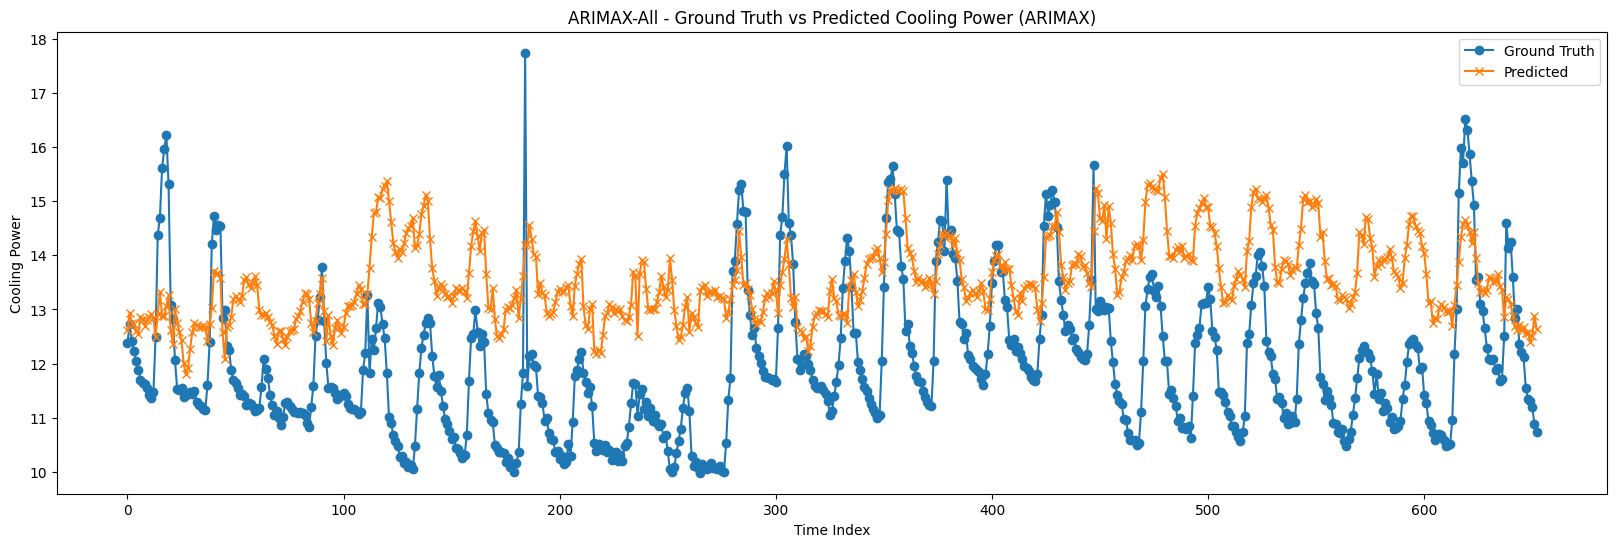

Test MAE: 1.79
Test RMSE: 2.01
Test MAPE: 15.66%


c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\johnl\anaconda3\envs

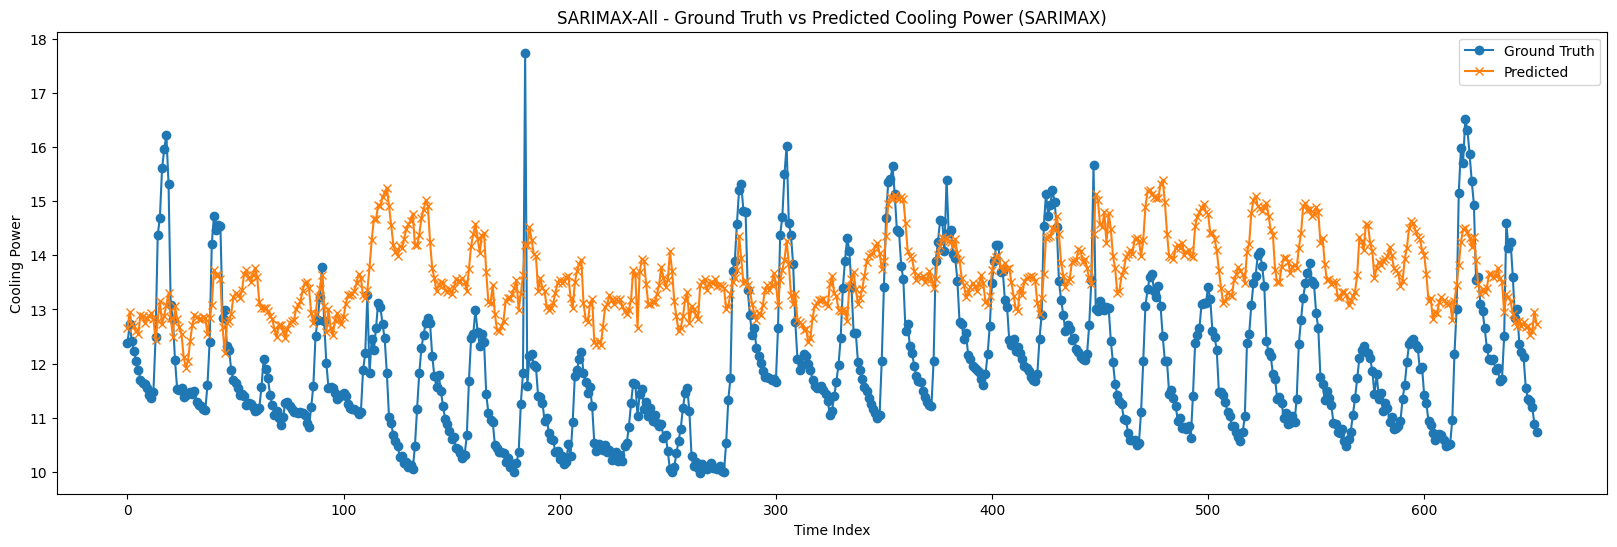

Test MAE: 1.85
Test RMSE: 2.06
Test MAPE: 2.39%


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from itertools import product

i=0
index=['ARIMAX-All','SARIMAX-All']#,'ARIMAX-CFS','SARIMAX-CFS','ARIMAX-Rank','SARIMAX-Rank']
for path in ['./clipped_dataset/Clipped_all_features.csv']:#,'./clipped_dataset/Clipped_CFS.csv','./clipped_dataset/Clipped_Rank.csv']:
    data = pd.read_csv(path)
    data['timestamp'] = pd.to_datetime(data['timestamp'])  # Ensure timestamp is datetime

    # Set timestamp as index
    data.set_index('timestamp', inplace=True)

    # Define target and exogenous features
    target = data['cooling_power']
    exog = data.drop(columns=[ 'Wind_Temperature_Interaction',
       'Wind_humidity_Interaction', 
       'Temp_Difference', 'Humidity_Difference',
       'Rainfall_Humidity_Interaction', 'outside_temperature',
       'outside_humidity', 'wind_speed', 'rainfall', 'inner_temperature',
       'inner_humidity', 'cooling_power'])
    print(exog.head())
    # Split the dataset into train, validation, and test sets
    train_size = 0.7
    val_size = 0.15

    train_end = int(len(data) * train_size)
    val_end = train_end + int(len(data) * val_size)

    y_train, y_val, y_test = target[:train_end], target[train_end:val_end], target[val_end:]
    exog_train, exog_val, exog_test = exog[:train_end], exog[train_end:val_end], exog[val_end:]

    # Hyperparameter tuning for ARIMAX using AIC
    best_arimax_order = (1,1,1)
    best_arimax_aic = float('inf')

    p_values = range(1, 2)
    d_values = range(1, 2)
    q_values = range(1, 2)

    # for order in product(p_values, d_values, q_values):
    #     try:
    #         model = ARIMA(endog=y_train, exog=exog_train, order=order)
    #         model_fit = model.fit()
    #         if model_fit.aic < best_arimax_aic:
    #             best_arimax_aic = model_fit.aic
    #             best_arimax_order = order
    #     except Exception as e:
    #         continue

    # Hyperparameter tuning for SARIMAX using AIC
    best_sarimax_order = (2,1,1)
    best_sarimax_seasonal_order = (0,0,1,24)
    best_sarimax_aic = float('inf')

    seasonal_p_values = range(0, 2)
    seasonal_d_values = range(0, 1)
    seasonal_q_values = range(0, 2)
    seasonal_m = [24]

    # for order in product(p_values, d_values, q_values):
    #     for seasonal_order in product(seasonal_p_values, seasonal_d_values, seasonal_q_values, seasonal_m):
    #         try:
    #             model = SARIMAX(endog=y_train, exog=exog_train, order=order, seasonal_order=seasonal_order)
    #             model_fit = model.fit(disp=False)
    #             if model_fit.aic < best_sarimax_aic:
    #                 best_sarimax_aic = model_fit.aic
    #                 best_sarimax_order = order
    #                 best_sarimax_seasonal_order = seasonal_order
    #         except Exception as e:
    #             continue


    #print(best_arimax_order,best_sarimax_order,best_sarimax_seasonal_order)
    ariam_true=0
    if ariam_true==0:
        final_model = ARIMA(endog=pd.concat([y_train,y_val],axis=0), exog=pd.concat([exog_train,exog_val],axis=0), order=best_arimax_order)
        model_type = 'ARIMAX'
    else:
        final_model = SARIMAX(endog=y_train, exog=exog_train, order=best_sarimax_order, seasonal_order=best_sarimax_seasonal_order)
        model_type = 'SARIMAX'

    final_model_fit = final_model.fit()
    #print(exog_test.shape, )
    predictions_test = final_model_fit.forecast(steps=len(y_test), exog=exog_test)
    # exog_test_aligned = exog_test.loc[y_test.index]
    # predictions_test = final_model_fit.predict(
    #     start=y_test.index[0],  # Start from the first timestamp in test data
    #     end=y_test.index[-1],   # End at the last timestamp in test data
    #     exog=exog_test_aligned
    # )
    #print(predictions_test)
    predictions_test_1=predictions_test.reset_index(drop=True)
    #print(y_test)
    y_test_1=y_test.reset_index(drop=True)
    plt.figure(figsize=(20, 6))
    plt.plot(y_test_1[:].values, marker='o', label='Ground Truth')
    plt.plot(predictions_test_1[:], marker='x', label='Predicted')
    plt.title(f'{index[i]} - Ground Truth vs Predicted Cooling Power ({model_type})')
    plt.xlabel('Time Index')
    plt.ylabel('Cooling Power')
    plt.legend()
    plt.show()

    # Evaluate final model on test set
    test_mae = mean_absolute_error(y_test, predictions_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, predictions_test))
    test_mape = np.mean(np.abs((y_test - predictions_test) / y_test)) * 100

    print(f"Test MAE: {test_mae:.2f}")
    print(f"Test RMSE: {test_rmse:.2f}")
    print(f"Test MAPE: {test_mape:.2f}%")
    #results.append([index[i],test_mae, test_mape, test_rmse])
    i+=1
    ariam_true=1
    if ariam_true==0:
        final_model = ARIMA(endog=pd.concat([y_train,y_val],axis=0), exog=pd.concat([exog_train,exog_val],axis=0), order=best_arimax_order)
        model_type = 'ARIMAX'
    else:
        final_model = SARIMAX(endog=y_train, exog=exog_train, order=best_sarimax_order, seasonal_order=best_sarimax_seasonal_order)
        model_type = 'SARIMAX'

    final_model_fit = final_model.fit()
    #print(exog_test.shape, )
    predictions_test = final_model_fit.forecast(steps=len(y_test), exog=exog_test)
    # exog_test_aligned = exog_test.loc[y_test.index]
    # predictions_test = final_model_fit.predict(
    #     start=y_test.index[0],  # Start from the first timestamp in test data
    #     end=y_test.index[-1],   # End at the last timestamp in test data
    #     exog=exog_test_aligned
    # )
    #print(predictions_test)
    predictions_test_1=predictions_test.reset_index(drop=True)
    #print(y_test)
    y_test_1=y_test.reset_index(drop=True)
    plt.figure(figsize=(20, 6))
    plt.plot(y_test_1[:].values, marker='o', label='Ground Truth')
    plt.plot(predictions_test_1[:], marker='x', label='Predicted')
    plt.title(f'{index[i]} - Ground Truth vs Predicted Cooling Power ({model_type})')
    plt.xlabel('Time Index')
    plt.ylabel('Cooling Power')
    plt.legend()
    plt.show()

    # Evaluate final model on test set
    test_mae = mean_absolute_error(y_test, predictions_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, predictions_test))
    test_mape = np.mean(np.abs((y_test - predictions_test) / y_test)) * 100

    print(f"Test MAE: {test_mae:.2f}")
    print(f"Test RMSE: {test_rmse:.2f}")
    print(f"Test MAPE: {test_mape:.2f}%")

    #results.append([index[i],test_mae, test_mape, test_rmse])
    i+=1

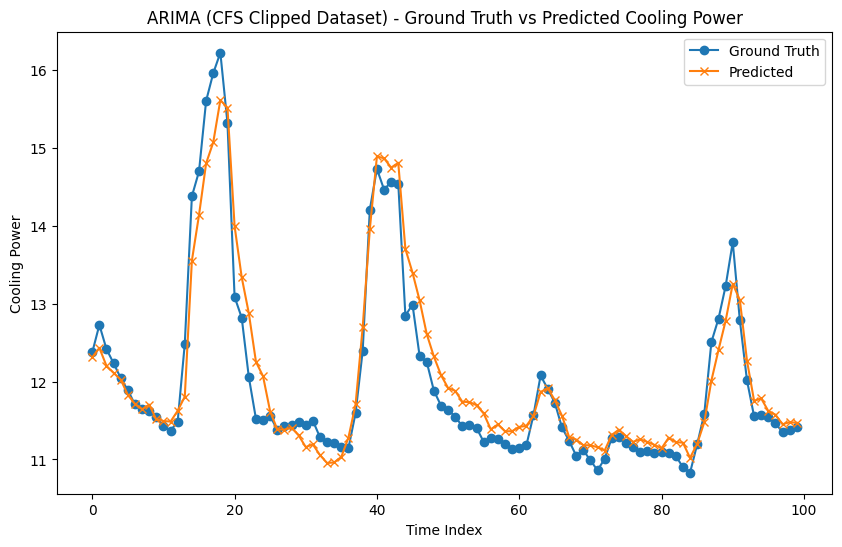

Test MAE: 0.60
Test RMSE: 0.77
Test MAPE: 4.90%


In [9]:
# data = pd.read_csv('./clipped_dataset/Clipped_CFS.csv')
# data['timestamp'] = pd.to_datetime(data['timestamp'])  # Ensure timestamp is datetime

# # Set timestamp as index
# data.set_index('timestamp', inplace=True)

# # Define target and exogenous features
# target = data['cooling_power']
# exog = data.drop(columns=['cooling_power'])

# # Split the dataset into train, validation, and test sets
# train_size = 0.7
# val_size = 0.15

# train_end = int(len(data) * train_size)
# val_end = train_end + int(len(data) * val_size)

# y_train, y_val, y_test = target[:train_end], target[train_end:val_end], target[val_end:]
# exog_train, exog_val, exog_test = exog[:train_end], exog[train_end:val_end], exog[val_end:]

# # Hyperparameter tuning for ARIMAX using AIC
# best_arimax_order = (1,1,1)
# best_arimax_aic = float('inf')

# p_values = range(1, 2)
# d_values = range(1, 2)
# q_values = range(1, 2)
# ariam_true=0
# if ariam_true==0:
#     final_model = ARIMA(endog=pd.concat([y_train,y_val],axis=0), exog=pd.concat([exog_train,exog_val],axis=0), order=best_arimax_order)
#     model_type = 'ARIMAX'
# else:
#     final_model = SARIMAX(endog=y_train, exog=exog_train, order=best_sarimax_order, seasonal_order=best_sarimax_seasonal_order)
#     model_type = 'SARIMAX'

# final_model_fit = final_model.fit()
# #print(exog_test.shape, )
# predictions_test = final_model_fit.forecast(steps=len(y_test), exog=exog_test)
# # exog_test_aligned = exog_test.loc[y_test.index]
# # predictions_test = final_model_fit.predict(
# #     start=y_test.index[0],  # Start from the first timestamp in test data
# #     end=y_test.index[-1],   # End at the last timestamp in test data
# #     exog=exog_test_aligned
# # )
# #print(predictions_test)
# predictions_test_1=predictions_test.reset_index(drop=True)
#print(y_test)
y_test_1=y_test.reset_index(drop=True)
plt.figure(figsize=(10, 6))
plt.plot(y_test_1[:100].values, marker='o', label='Ground Truth')
plt.plot(predictions_test_1[:100], marker='x', label='Predicted')
plt.title(f'ARIMA (CFS Clipped Dataset) - Ground Truth vs Predicted Cooling Power')
plt.xlabel('Time Index')
plt.ylabel('Cooling Power')
plt.legend()
plt.show()

# Evaluate final model on test set
test_mae = mean_absolute_error(y_test, predictions_test)
test_rmse = np.sqrt(mean_squared_error(y_test, predictions_test))
test_mape = np.mean(np.abs((y_test - predictions_test) / y_test)) * 100

print(f"Test MAE: {test_mae:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Test MAPE: {test_mape:.2f}%")
#results.append([index[i],test_mae, test_mape, test_rmse])


c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


CFS_final_test_baguio.csv
CFS_final_test_bandung.csv
CFS_final_test_dalat.csv
CFS_final_test_genting.csv


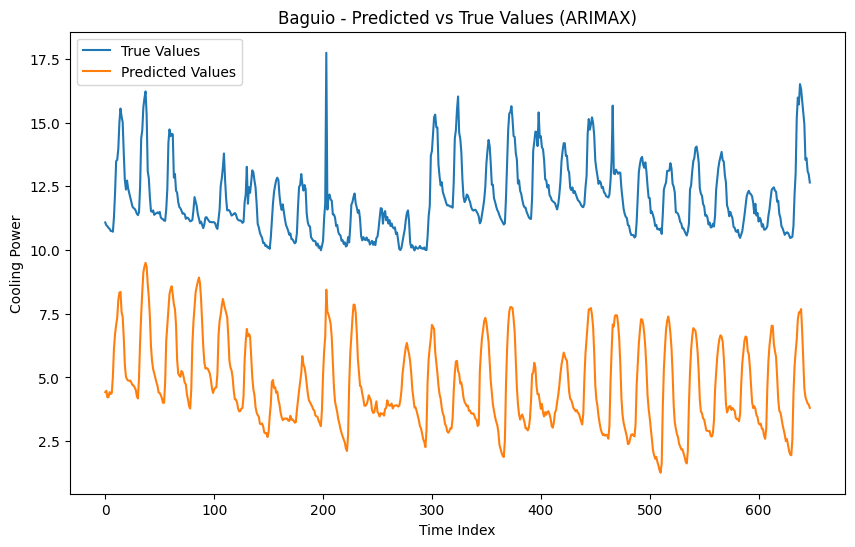

C:\Users\johnl\AppData\Local\Temp\ipykernel_5088\90255864.py:85: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  test_mape = np.mean(np.abs((tg - predictions_test) / tg)) * 100


Baguio Test MAE: 7.29
Baguio Test RMSE: 7.42
Baguio Test MSE: 55.00
Baguio Test MAPE: nan%


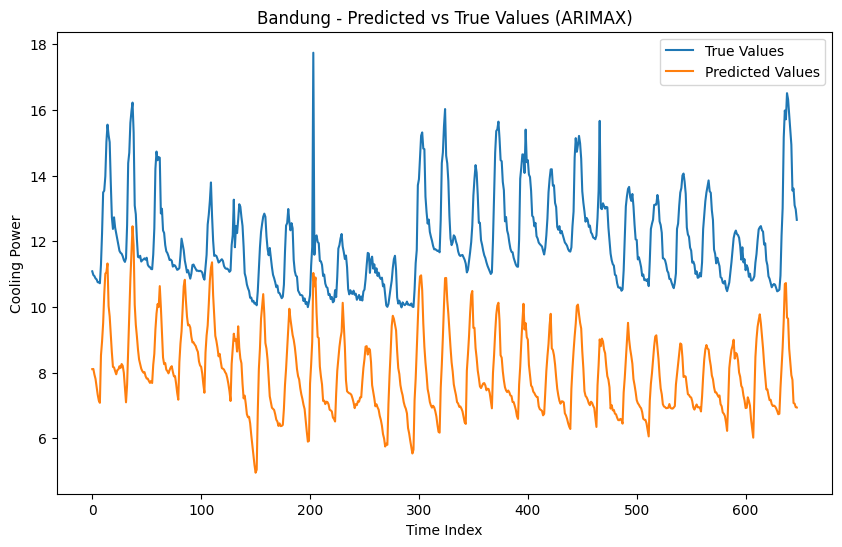

C:\Users\johnl\AppData\Local\Temp\ipykernel_5088\90255864.py:85: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  test_mape = np.mean(np.abs((tg - predictions_test) / tg)) * 100


Bandung Test MAE: 4.01
Bandung Test RMSE: 4.14
Bandung Test MSE: 17.14
Bandung Test MAPE: nan%


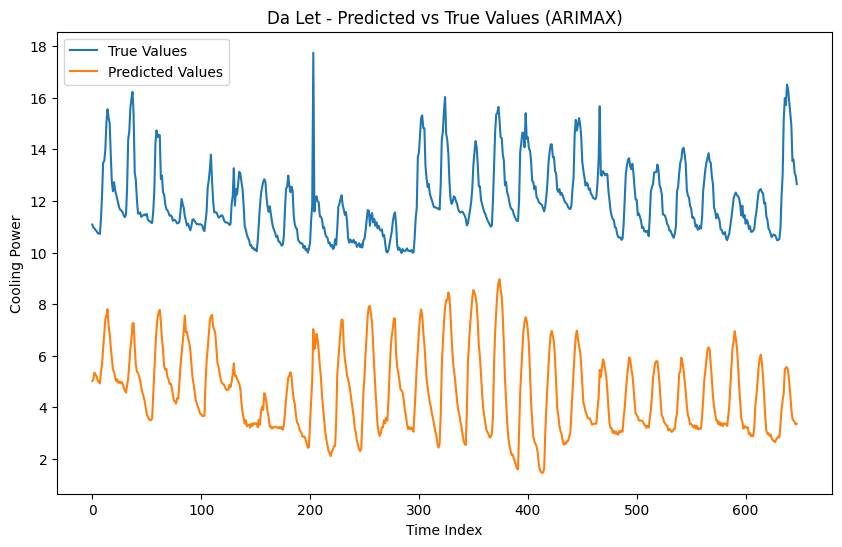

C:\Users\johnl\AppData\Local\Temp\ipykernel_5088\90255864.py:85: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  test_mape = np.mean(np.abs((tg - predictions_test) / tg)) * 100


Da Let Test MAE: 7.40
Da Let Test RMSE: 7.51
Da Let Test MSE: 56.46
Da Let Test MAPE: nan%


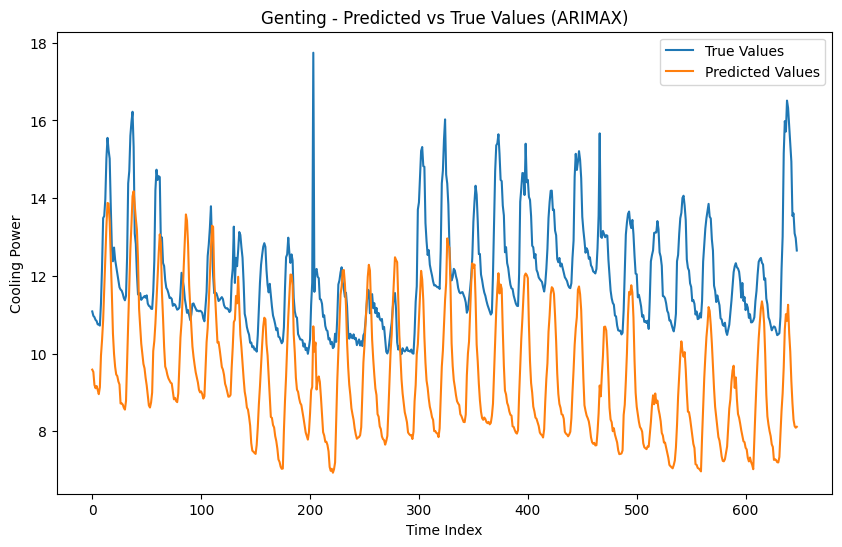

Genting Test MAE: 2.70
Genting Test RMSE: 2.92
Genting Test MSE: 8.55
Genting Test MAPE: nan%


C:\Users\johnl\AppData\Local\Temp\ipykernel_5088\90255864.py:85: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  test_mape = np.mean(np.abs((tg - predictions_test) / tg)) * 100


In [20]:
#######################
## Setting the Model ##
#######################
data = pd.read_csv('./clipped_dataset/Clipped_CFS.csv')
data['timestamp'] = pd.to_datetime(data['timestamp'])  # Ensure timestamp is datetime

SEED = 12
np.random.seed(SEED)

# Set timestamp as index
data.set_index('timestamp', inplace=True)

# Define target and exogenous features
target = data['cooling_power']
exog = data.drop(columns=['cooling_power'])

# Split the dataset into train, validation, and test sets
train_size = 0.7
val_size = 0.15

train_end = int(len(data) * train_size)
val_end = train_end + int(len(data) * val_size)

y_train, y_val, y_test = target[:train_end], target[train_end:val_end], target[val_end:]
exog_train, exog_val, exog_test = exog[:train_end], exog[train_end:val_end], exog[val_end:]
ariam_true=0

############## Change hyperparameter ###############
best_arimax_order=(1,1,1)
#####################################################

if ariam_true==0:
    final_model = ARIMA(endog=pd.concat([y_train,y_val],axis=0), exog=pd.concat([exog_train,exog_val],axis=0), order=best_arimax_order)
    model_type = 'ARIMAX'
else:
    final_model = SARIMAX(endog=y_train, exog=exog_train, order=best_sarimax_order, seasonal_order=best_sarimax_seasonal_order)
    model_type = 'SARIMAX'

final_model_fit = final_model.fit()
#print(exog_test.shape, )

###############################
## Setting the final dataset ##
###############################
import os

def process_dataset(file_path):
    print(file_path)
    df=pd.read_csv('./final_dataset/'+file_path)
    df['timestamp'] = pd.to_datetime(df['timestamp'])  # Ensure timestamp is datetime


# Set timestamp as index
    df.set_index('timestamp', inplace=True)

# Define target and exogenous features
    target1 = df['cooling_power']
    exog1 = df.drop(columns=['cooling_power'])
    return (target1,exog1)


final_dataset = [process_dataset(x) for x in os.listdir('./final_dataset')]
region = ['Baguio','Bandung','Da Let','Genting']

new=[]

i=0
for tg,ex in final_dataset:
    predictions_test = final_model_fit.forecast(steps=len(tg), exog=ex)
    predictions_test_1=predictions_test.reset_index(drop=True)
    #print(y_test)
    tg=tg.reset_index(drop=True)
    plt.figure(figsize=(10, 6))
    plt.plot(tg, label='True Values')
    plt.plot(predictions_test_1, label='Predicted Values')
    plt.title(f'{region[i]} - Predicted vs True Values ({model_type})')
    plt.xlabel('Time Index')
    plt.ylabel('Cooling Power')
    plt.legend()
    plt.show()

    # Evaluate final model on test set
    test_mae = mean_absolute_error(tg, predictions_test)
    test_rmse = np.sqrt(mean_squared_error(tg, predictions_test))
    test_mape = np.mean(np.abs((tg - predictions_test) / tg)) * 100

    print(f"{region[i]} Test MAE: {test_mae:.2f}")
    print(f"{region[i]} Test RMSE: {test_rmse:.2f}")
    print(f"{region[i]} Test MSE: {test_rmse**2:.2f}" )
    print(f"{region[i]} Test MAPE: {test_mape:.2f}%")
    
    a=pd.DataFrame(predictions_test_1)
    a.columns=['y_pred']
    a.to_csv(f'./prediction/{region[i]}_ARIMAX_prediction.csv')
    i+=1
    


In [5]:
print(results)

[['ARIMAX-All', 0.8572105734462045, 7.092359082959378, 1.0507765058808616], ['SARIMAX-All', 1.1532508534732178, 26.768175718582864, 1.3943067236204543], ['ARIMAX-CFS', 0.6024059479692083, 4.900580504709637, 0.7694242370578628], ['SARIMAX-CFS', 0.6453108661455969, 19.078459089863497, 0.827712663340534], ['ARIMAX-Rank', 0.9471573936688906, 7.905799564140701, 1.1645967977809624], ['SARIMAX-Rank', 1.1173338222665994, 15.553055350227602, 1.3618082226237949]]


## 2. Without wind/rainfall dataset test

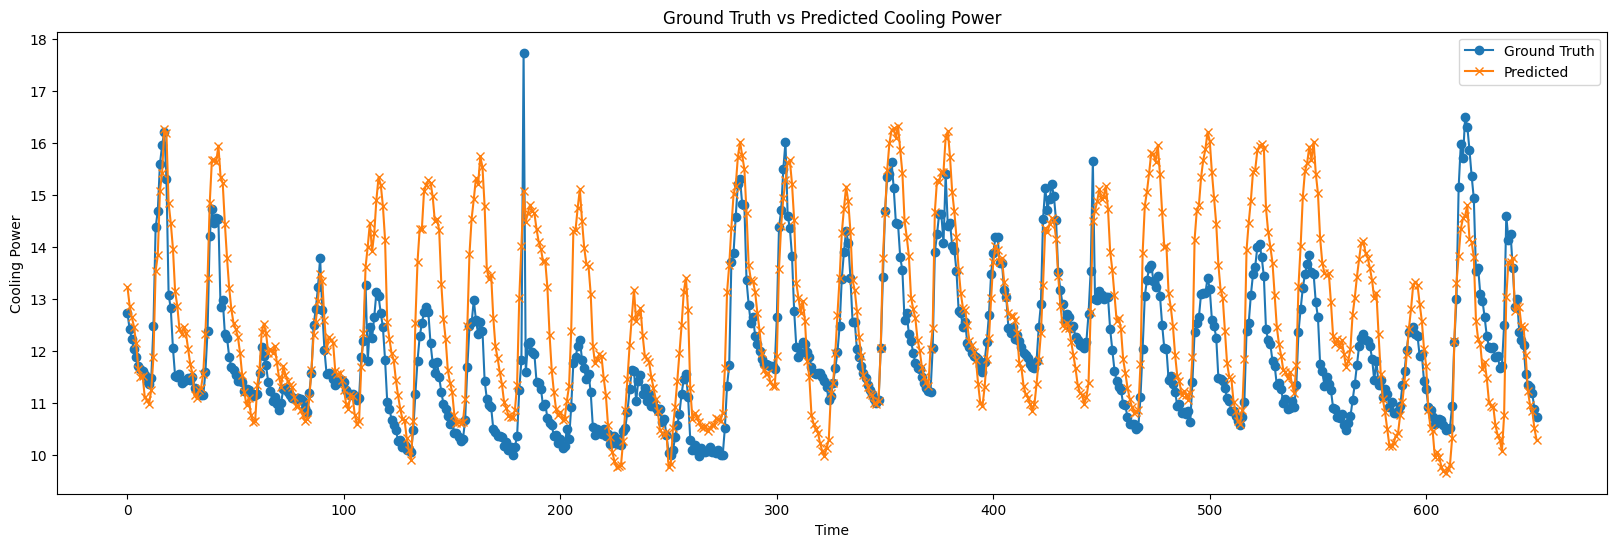

Test MAE: 0.98
Test MAPE: 8.16%
Test RMSE: 1.25


In [7]:
resultss=[]

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('./Final_1h_Feature Engineering_No Missing.csv')
data['timestamp'] = pd.to_datetime(data['timestamp'])  # Ensure timestamp is datetime

# Set timestamp as index (optional for time-series)
data.set_index('timestamp', inplace=True)

# Define features and target
features = data.drop(columns=['cooling_power','Wind_Temperature_Interaction','Wind_humidity_Interaction','Rainfall_Humidity_Interaction','wind_speed','rainfall'])
target = data['cooling_power']

# Split the dataset into train, validation, and test sets
train_size = 0.7
val_size = 0.15

X_train, X_temp, y_train, y_temp = train_test_split(features, target, test_size=(1 - train_size), shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=(val_size / (1 - train_size)), shuffle=False)

# Apply Min-Max Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

def evaluate_model(model, X, y):
    predictions = model.predict(X)
    mae = mean_absolute_error(y, predictions)
    mape = np.mean(np.abs((y - predictions) / y)) * 100
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return mae, mape, rmse

# Hyperparameter tuning with Ridge and Lasso regression
best_model = None
best_score = float('inf')

for alpha in [0.01, 0.1, 1, 10, 100]:
    for model_type in [Ridge, Lasso]:
        model = model_type(alpha=alpha)
        model.fit(X_train_scaled, y_train)
        val_mae, val_mape, val_rmse = evaluate_model(model, X_val_scaled, y_val)
        if val_rmse < best_score:
            best_score = val_rmse
            best_model = model

# Final evaluation on test set with the best model
test_mae, test_mape, test_rmse = evaluate_model(best_model, X_test_scaled, y_test)

# Predict test data
predictions_test = best_model.predict(X_test_scaled)

# Plot results
plt.figure(figsize=(20, 6))
plt.plot(y_test.values, label='Ground Truth', marker='o')
plt.plot(predictions_test, label='Predicted', marker='x')
plt.title('Ground Truth vs Predicted Cooling Power')
plt.xlabel('Time')
plt.ylabel('Cooling Power')
plt.legend()
plt.show()

# Evaluation metrics
print(f"Test MAE: {test_mae:.2f}")
print(f"Test MAPE: {test_mape:.2f}%")
print(f"Test RMSE: {test_rmse:.2f}")
resultss.append(['LR_wo_wind,rainfall',test_mae, test_mape, test_rmse])


c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\tsa\base\t

(1, 1, 2) (1, 1, 2) (1, 0, 0, 24)


c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


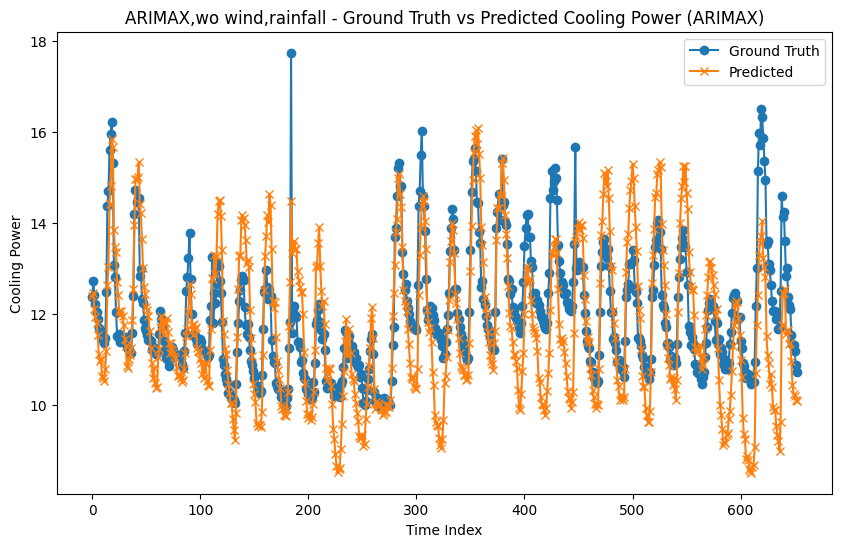

Test MAE: 0.87
Test RMSE: 1.08
Test MAPE: 7.18%


c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


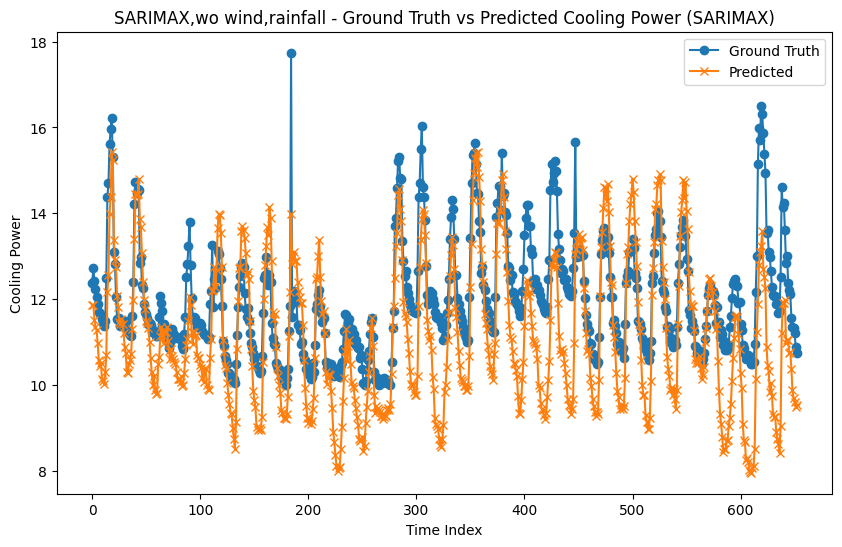

Test MAE: 1.12
Test RMSE: 1.36
Test MAPE: 24.27%


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from itertools import product

# Load the dataset
data = pd.read_csv('./Final_1h_Feature Engineering_No Missing.csv')
data['timestamp'] = pd.to_datetime(data['timestamp'])  # Ensure timestamp is datetime

# Set timestamp as index
data.set_index('timestamp', inplace=True)

# Define target and exogenous features
target = data['cooling_power']
exog = data.drop(columns=['cooling_power','Wind_Temperature_Interaction','Wind_humidity_Interaction','Rainfall_Humidity_Interaction','wind_speed','rainfall'])

# Split the dataset into train, validation, and test sets
train_size = 0.7
val_size = 0.15

train_end = int(len(data) * train_size)
val_end = train_end + int(len(data) * val_size)

y_train, y_val, y_test = target[:train_end], target[train_end:val_end], target[val_end:]
exog_train, exog_val, exog_test = exog[:train_end], exog[train_end:val_end], exog[val_end:]

# Hyperparameter tuning for ARIMAX using AIC
best_arimax_order = None
best_arimax_aic = float('inf')

p_values = range(1, 2)
d_values = range(1, 2)
q_values = range(2, 3)

for order in product(p_values, d_values, q_values):
    try:
        model = ARIMA(endog=y_train, exog=exog_train, order=order)
        model_fit = model.fit()
        if model_fit.aic < best_arimax_aic:
            best_arimax_aic = model_fit.aic
            best_arimax_order = order
    except Exception as e:
        continue

# Hyperparameter tuning for SARIMAX using AIC
best_sarimax_order = None
best_sarimax_seasonal_order = None
best_sarimax_aic = float('inf')

seasonal_p_values = range(0, 2)
seasonal_d_values = range(0, 1)
seasonal_q_values = range(0, 2)
seasonal_m = [24]

for order in product(p_values, d_values, q_values):
    for seasonal_order in product(seasonal_p_values, seasonal_d_values, seasonal_q_values, seasonal_m):
        try:
            model = SARIMAX(endog=y_train, exog=exog_train, order=order, seasonal_order=seasonal_order)
            model_fit = model.fit(disp=False)
            if model_fit.aic < best_sarimax_aic:
                best_sarimax_aic = model_fit.aic
                best_sarimax_order = order
                best_sarimax_seasonal_order = seasonal_order
        except Exception as e:
            continue

print(best_arimax_order,best_sarimax_order,best_sarimax_seasonal_order)
ariam_true=0
if ariam_true==0:
    final_model = ARIMA(endog=pd.concat([y_train,y_val],axis=0), exog=pd.concat([exog_train,exog_val],axis=0), order=best_arimax_order)
    model_type = 'ARIMAX'
else:
    final_model = SARIMAX(endog=y_train, exog=exog_train, order=best_sarimax_order, seasonal_order=best_sarimax_seasonal_order)
    model_type = 'SARIMAX'

final_model_fit = final_model.fit()
#print(exog_test.shape, )
predictions_test = final_model_fit.forecast(steps=len(y_test), exog=exog_test)
# exog_test_aligned = exog_test.loc[y_test.index]
# predictions_test = final_model_fit.predict(
#     start=y_test.index[0],  # Start from the first timestamp in test data
#     end=y_test.index[-1],   # End at the last timestamp in test data
#     exog=exog_test_aligned
# )
#print(predictions_test)
predictions_test_1=predictions_test.reset_index(drop=True)
#print(y_test)
y_test_1=y_test.reset_index(drop=True)
plt.figure(figsize=(10, 6))
plt.plot(y_test_1[:].values, marker='o', label='Ground Truth')
plt.plot(predictions_test_1[:], marker='x', label='Predicted')
plt.title(f'ARIMAX,wo wind,rainfall - Ground Truth vs Predicted Cooling Power ({model_type})')
plt.xlabel('Time Index')
plt.ylabel('Cooling Power')
plt.legend()
plt.show()

# Evaluate final model on test set
test_mae = mean_absolute_error(y_test, predictions_test)
test_rmse = np.sqrt(mean_squared_error(y_test, predictions_test))
test_mape = np.mean(np.abs((y_test - predictions_test) / y_test)) * 100

print(f"Test MAE: {test_mae:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Test MAPE: {test_mape:.2f}%")
resultss.append(['ARIMAX,wo wind,rainfall',test_mae, test_mape, test_rmse])
i+=1
ariam_true=1
if ariam_true==0:
    final_model = ARIMA(endog=pd.concat([y_train,y_val],axis=0), exog=pd.concat([exog_train,exog_val],axis=0), order=best_arimax_order)
    model_type = 'ARIMAX'
else:
    final_model = SARIMAX(endog=y_train, exog=exog_train, order=best_sarimax_order, seasonal_order=best_sarimax_seasonal_order)
    model_type = 'SARIMAX'

final_model_fit = final_model.fit()
#print(exog_test.shape, )
predictions_test = final_model_fit.forecast(steps=len(y_test), exog=exog_test)
# exog_test_aligned = exog_test.loc[y_test.index]
# predictions_test = final_model_fit.predict(
#     start=y_test.index[0],  # Start from the first timestamp in test data
#     end=y_test.index[-1],   # End at the last timestamp in test data
#     exog=exog_test_aligned
# )
#print(predictions_test)
predictions_test_1=predictions_test.reset_index(drop=True)
#print(y_test)
y_test_1=y_test.reset_index(drop=True)
plt.figure(figsize=(10, 6))
plt.plot(y_test_1[:].values, marker='o', label='Ground Truth')
plt.plot(predictions_test_1[:], marker='x', label='Predicted')
plt.title(f'SARIMAX,wo wind,rainfall - Ground Truth vs Predicted Cooling Power ({model_type})')
plt.xlabel('Time Index')
plt.ylabel('Cooling Power')
plt.legend()
plt.show()

# Evaluate final model on test set
test_mae = mean_absolute_error(y_test, predictions_test)
test_rmse = np.sqrt(mean_squared_error(y_test, predictions_test))
test_mape = np.mean(np.abs((y_test - predictions_test) / y_test)) * 100

print(f"Test MAE: {test_mae:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Test MAPE: {test_mape:.2f}%")
resultss.append(['SARIMAX,wo wind,rainfall',test_mae, test_mape, test_rmse])

In [9]:
print(resultss)

[['LR_wo_wind,rainfall', 0.9832419346926691, 8.157396201458013, 1.249809098839408], ['ARIMAX,wo wind,rainfall', 0.8702712739407844, 7.177985562806816, 1.0810658248499803], ['SARIMAX,wo wind,rainfall', 1.1177199872369368, 24.27201022285673, 1.359214219993069]]
